## Simple Linear Regression

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import make_regression
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import load_diabetes

In [2]:
data = pd.read_csv("placement.csv")

data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


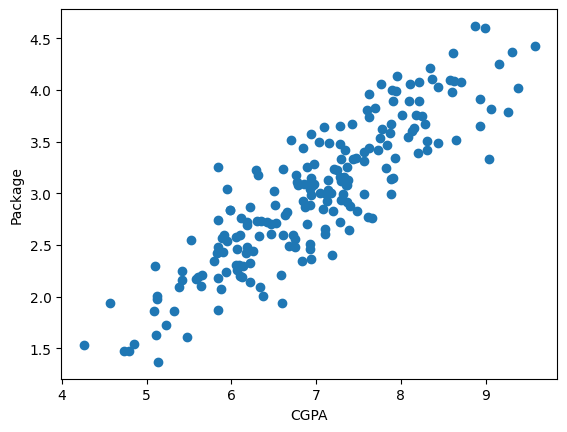

In [3]:
plt.scatter(data["cgpa"],data["package"])
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.show();

In [4]:
X = data.iloc[:,0:1].values
y = data.iloc[:,-1].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

lr_model = LinearRegression()

In [6]:
lr_model.fit(X_train, y_train)

print(lr_model.coef_, lr_model.intercept_)

[0.55795197] -0.8961119222429144


In [13]:
y_predicted = lr_model.predict(X_test)

print("The mean squared error {0}".format(mean_squared_error(y_test, y_predicted)))
print("The mean absolute error {0}".format(mean_absolute_error(y_test, y_predicted)))
print("The R2 score {0}".format(r2_score(y_test, y_predicted)))

adjusted_r2_score = 1 - (((1-r2_score(y_test, y_predicted)) * (X_test.shape[0]-1))  / (X_test.shape[0]-1-1))

print("The adjusted R2 Score is: {0}".format(adjusted_r2_score))

The mean squared error 0.12129235313495527
The mean absolute error 0.2884710931878175
The R2 score 0.780730147510384
The adjusted R2 Score is: 0.7749598882343415


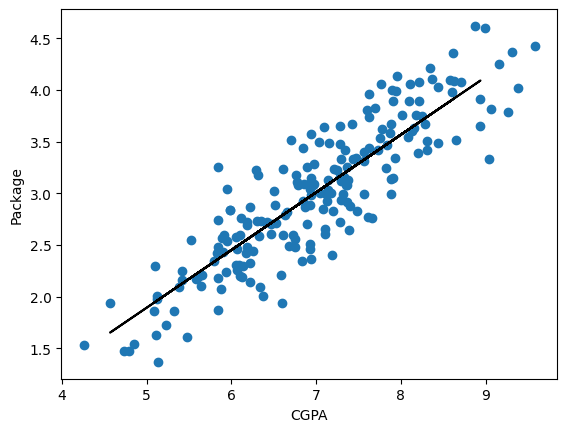

In [20]:
# Plotting the linear regression line that we have got

plt.scatter(data["cgpa"],data["package"])
plt.plot(X_test, lr_model.predict(X_test), color = "black")
plt.xlabel("CGPA")
plt.ylabel("Package");

In [34]:
# Creating a python class to do the job of OLS and then comparing it with the sklearn model of OLS

# note that this will only work for the one feature data (Simple Linear Regression)

class custom_lr:
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        print(X_train.shape)
        # calculating the slope (m)

        # calculating the numerator of formula OLS of m

        numerator = 0
        denominator = 0

        for i in range(X_train.shape[0]):

            numerator = numerator + ((y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean()))
            denominator = denominator + (X_train[i] - X_train.mean())**2

        self.m = numerator/denominator

        # calculating the intercept using the OLS formula

        self.b = y_train.mean() - (self.m * X_train.mean())

        print("The coefficient is: {0} and the intercept is: {1}".format(self.m, self.b))

    def predict(self, X_test):
        
        return self.m * X_test + self.b

    def compare_sklearn(self, lr_model):

        print("The sklearn model values are - coefficient: {0}, intercept: {1}".format(lr_model.coef_, lr_model.intercept_))
        print("The custom OLS values are    - coefficient: {0}, intercept: {1}".format(self.m, self.b[0]))

lr = custom_lr()

lr.fit(X_train, y_train)

(160, 1)
The coefficient is: [0.55795197] and the intercept is: [-0.89611192]


In [26]:
lr.compare_sklearn(lr_model)

The sklearn model values are - coefficient: [0.55795197], intercept: -0.8961119222429144
The custom OLS values are    - coefficient: [0.55795197], intercept: -0.8961119222429152


### Multiple Linear Regression

In [13]:
X, y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

df = pd.DataFrame({"feature1":X[:,0],'feature2':X[:,1],'target':y})

In [14]:
df.head()

,feature1,feature2,target
0,0.184599,-1.308663,-90.853492
1,1.725187,0.548378,130.012390
2,0.362181,-1.571825,-88.705444
3,0.556528,0.219998,104.469353
4,0.355033,-0.528883,-37.529111


In [15]:
fig = px.scatter_3d(df, x="feature1", y="feature2", z="target")

fig.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [17]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)

print("The mean squared error {0}".format(mean_squared_error(y_test, y_pred)))
print("The mean absolute error {0}".format(mean_absolute_error(y_test, y_pred)))
print("The R2 score {0}".format(r2_score(y_test, y_pred)))

adjusted_r2_score = 1 - (((1-r2_score(y_test, y_pred)) * (X_test.shape[0]-1))  / (X_test.shape[0]-1-1))

print("The adjusted R2 Score is: {0}".format(adjusted_r2_score))

print('The coefficients of LR is: {0}'.format(lr.coef_))

The mean squared error 1951.0723828475882
The mean absolute error 35.91159407148926
The R2 score 0.9119767818938097
The adjusted R2 Score is: 0.9070866031101325
The coefficients of LR is: [90.468582  88.7385176]


In [22]:
X,y = load_diabetes(return_X_y=True)

print(X.shape)

(442, 10)


In [24]:
# Applying sklearn linear regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(r2_score(y_test, y_pred))

print("The coefficients of the reg: {0}".format(reg.coef_))

0.4399338661568968
The coefficients of the reg: [  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]


In [31]:
# Custom Multiple linear regression

class custom_mlr:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1::]
        print(betas)

    def predict(self, X_test):

        y_pred = self.intercept_ + np.dot(X_test, self.coef_)

        return y_pred
        
lr = custom_mlr()

lr.fit(X_train, y_train)

[ 151.88331005   -9.15865318 -205.45432163  516.69374454  340.61999905
 -895.5520019   561.22067904  153.89310954  126.73139688  861.12700152
   52.42112238]


In [32]:
y_pred = lr.predict(X_test)

In [33]:
print(r2_score(y_test, y_pred))

0.43993386615689756
